# 실습 4차시

내용:
*   Perceptron

기한:
**2022년 11월 3일 목요일 오후 1시 59분**

 ## **퍼셉트론이란?**

퍼셉트론은 신경망의 가장 기초가 되는 기본 단위입니다. 생물학적 뉴런의 작업을 시뮬레이션하는 인공 뉴런이라고 할 수 있습니다.

퍼셉트론은 3가지 구성요소로 이루어져 있습니다.

* 입력(Inputs)

* 가중치(Weights)

* 출력(Output)

## **Perceptron Class**

Perceptron 클래스 작성하기

In [39]:
lines = []

class Perceptron:
  def __init__(self, num_inputs= 3, weights=[1, 1, 1]): #
    self.num_inputs = num_inputs
    self.weights = weights

  def weighted_sum(self, inputs):
    weighted_sum = 0
    for i in range(self.num_inputs):
      weighted_sum += inputs[i] * self.weights[i]
    return weighted_sum

  def activation(self, weighted_sum):
    if weighted_sum >= 0:
      return 1
    else:
      return -1

  def training(self, training_set):
    foundLine = False
    while foundLine:
      total_error = 0
      for inputs in training_set:
        prediction = self.activation(self.weighted_sum(inputs))
        actual = training_set[inputs]
        error = actual - prediction
        total_error += abs(error)

        for i in range(self.num_inputs):
          self.weights[i] += error * inputs[i]

      slope = -self.weights[0] / self.weights[1]
      intercept = -self.weights[2] / self.weights[1]
      y1 = (slope * 0) + intercept
      y2 = (slope * 50) + intercept
      lines.append([0, 50], [y1, y2])

      if total_error == 0:
        foundLine = True

In [40]:
my_perceptron = Perceptron()
small_dataset = {(0, 3):1, (3, 0):-1, (0, -3):-1, (-3, 0):1}

my_perceptron.training(small_dataset)
print(my_perceptron.weights)

[1, 1, 1]


### **가중합(Weighted Sum) 구하기**

입력과 가중치를 출력으로 변환하기 위해서는, 우선 각 입력에 대한 가중치를 더해서 가중합을 계산해야합니다.

```
weighted sum = x_1 * w_1 + x_2 * w_2 + ... + x_n * w_n
```

위 수식을 구현해봅니다.

### **활성화 함수(Activation Function)**

퍼셉트론의 출력은 앞에서 계산한 가중합으로부터 결과값을 생성함으로써 결정되게 됩니다. 결과값을 생성해주는 함수를 활성화 함수라고 합니다.

다양한 활성화 함수들이 존재하는데, 이번 실습에서는 Step Activation Function을 사용합니다.

* 입력에 대한 퍼셉트론의 가중합이 양수라면 1을 반환합니다.
* 입력에 대한 퍼셉트론의 가중합이 음수라면 -1을 반환합니다.

활성화 함수를 perceptron class에 구현해봅니다.

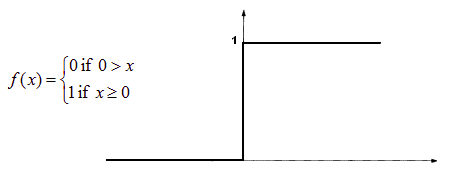

### **오차(Error) 구하기**

퍼셉트론의 출력값과 학습 데이터의 타겟값이 일치하지 않을 때, 오차를 구할 수 있습니다. 오차는 해당 모델과 실제 데이터간의 차이를 나타냅니다.

우리의 목표는 퍼셉트론을 오차가 작아지는 방향으로 학습시키는 것입니다. 훈련 오차는 실제 레이블 값에서 예측된 레이블 값을 빼서 계산됩니다.

```
training error = actual label - predicted label
```

Step activation function을 사용하는 퍼셉트론이 만드는 오차는 다음의 네 가지 경우를 띕니다.

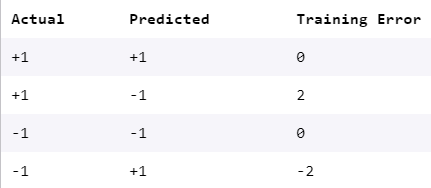


### **가중치 수정하기**

퍼셉트론 학습의 목표는 가중치를 올바른 방향으로 수정해서, 정답을 출력하는 최적의 가중치를 찾는 것입니다.

최적의 가중치를 찾는 방법 중, 가장 널리 사용되고 있는 것이 바로 경사하강법(Gradient Descent)입니다. 이번에 우리는 Step Activation Function을 사용하기 때문에, 경사하강법 중 Delta Rule을 통해 가중치를 학습시킬 것입니다.

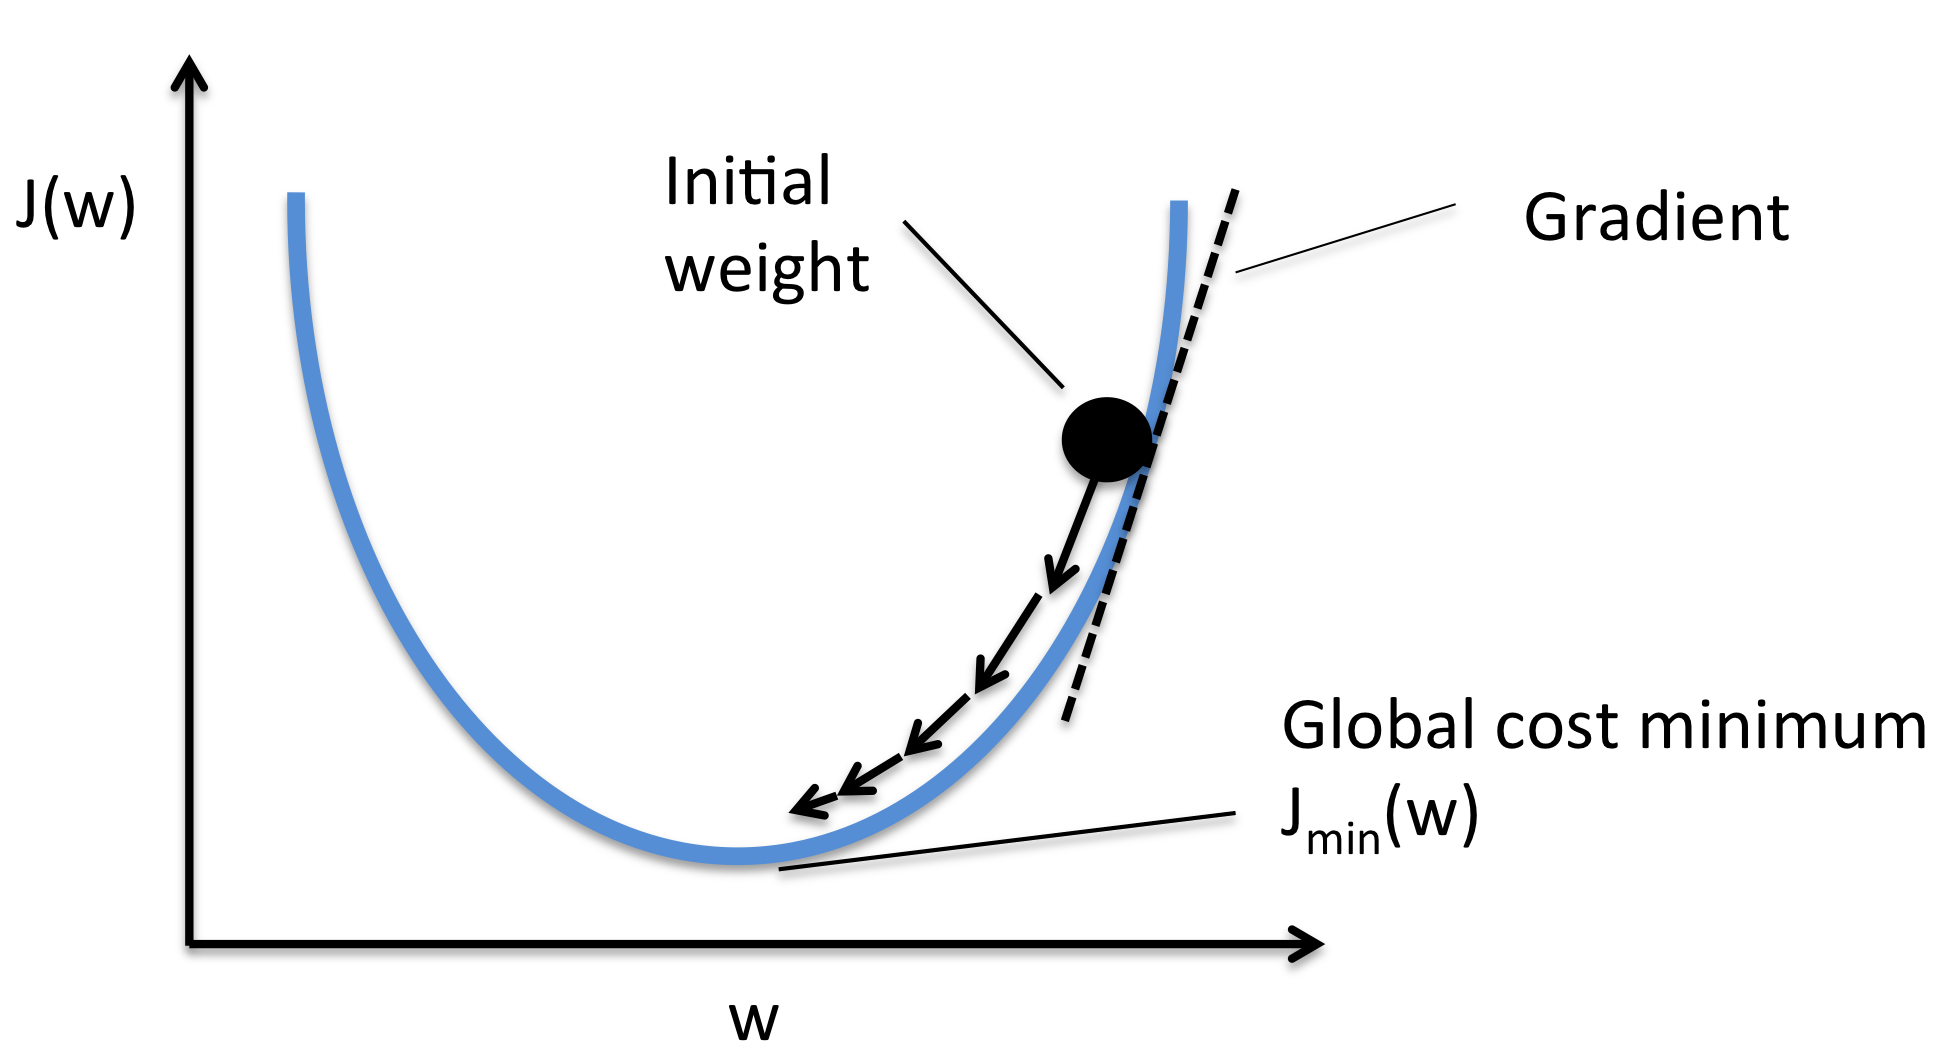

Delta rule은 다음의 간단한 규칙을 통해 가중치를 수정하게 됩니다.

```
weight = weight + learning rate * (error * input)
```

퍼셉트론은 모든 결과값을 정확하게 예측할 때까지 가중치를 계속 조정합니다. 그렇기 때문에 학습이 완료되기 전에 데이터셋을 여러번 반복하여 학습시켜야 할 수도 있습니다. 위 perceptron class에 학습시키는 코드를 수정해봅니다.

### **편향치(Bias)**

그러나 퍼셉트론의 정확도를 높이기 위해 약간의 조정이 필요한 경우가 있습니다. 이를 위해 우리는 퍼셉트론에 편향치를 추가합니다.

편향이 추가된 가중합의 식은 다음과 같습니다.

```
weighted sum = x_1 * w_1 + x_2 * w_2 + ... + x_n * w_n​ + w_b
```

다음 두 가지 변경사항만 고려하면 앞서 구현한 퍼셉트론에 편향을 적용할 수 있을 것입니다.

* 입력 데이터의 마지막에 1을 추가합니다 (이제 2 대신 3 개의 입력이 있음).
* 가중치 목록에 편향 가중치를 추가합니다 (이제 2 개 대신 3 개의 가중치가 있음).


위 perceptron class에 해당 코드를 추가해봅니다.

### **퍼셉트론을 통한 선형 분류**

퍼셉트론의 훈련 과정을 더 잘 이해하기 위해 퍼셉트론의 훈련 과정을 시각화 해봅니다.

가중치는 훈련 과정 전반에 걸쳐 변경되므로 해당 가중치를 의미있게 시각화 할 수만 있다면 기울기-절편 형식을 사용하여 선을 나타낼 수 있다는 것을 알고있을 것입니다. 퍼셉트론의 가중치는 퍼셉트론이 나타내는 선의 기울기와 절편을 찾는 데 사용할 수 있습니다.

* 기울기 = ```-self.weights[0] /self.weights[1]```
* 절편 = ```-self.weights[2] /self.weights[1]```

위 perceptron class에 해당 코드를 추가해봅니다.

### **퍼셉트론 학습시키기**

실제 대부분의 기계학습에서 사용하는 데이터는 tabular 형태를 띄고 있지만, 이번 실습에서는 입력값과 출력값을 dictionary 형태로 표현한 데이터셋을 사용하도록 하겠습니다. 우리가 사용할 데이터셋은 다음과 같은 형태를 지닙니다.

```
training_set = {(18, 49): -1, (2, 17): 1, (24, 35): -1, (14, 26): 1, (17, 34): -1}
```

In [41]:
# 다음 코드는 퍼셉트론에 학습시킬 데이터를 생성시켜주는 코드입니다. 
# 다음 코드를 실행시키고 해당 데이터의 특징을 살펴봅시다.

import random

def generate_training_set(num_points):
	x_coordinates = [random.randint(0, 50) for i in range(num_points)]
	y_coordinates = [random.randint(0, 50) for i in range(num_points)]
	training_set = dict()
	for x, y in zip(x_coordinates, y_coordinates):
		if x <= 45-y:
			training_set[(x,y)] = 1
		elif x > 45-y:
			training_set[(x,y)] = -1
	return training_set

In [42]:
#training 데이터셋을 generate_training_set 함수를 사용하여 30개의 데이터를 생성합니다.
training_set = generate_training_set(30)

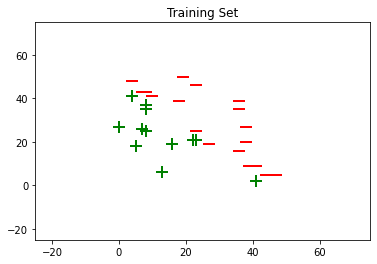

In [43]:
import seaborn
import matplotlib.pyplot as plt

x_plus = []
y_plus = []
x_minus = []
y_minus = []

for data in training_set:
	if training_set[data] == 1:
		x_plus.append(data[0])
		y_plus.append(data[1])
	elif training_set[data] == -1:
		x_minus.append(data[0])
		y_minus.append(data[1])
    
fig = plt.figure()
ax = plt.axes(xlim=(-25, 75), ylim=(-25, 75))

plt.scatter(x_plus, y_plus, marker = '+', c = 'green', s = 128, linewidth = 2)
plt.scatter(x_minus, y_minus, marker = '_', c = 'red', s = 128, linewidth = 2)

plt.title("Training Set")

plt.show()

In [44]:
# 퍼셉트론을 만들고 데이터에 훈련시켜 봅니다.
perceptron = Perceptron()
perceptron

아래 코드는 구현한 퍼셉트론이 가중치를 변화시켜가며 최적의 선을 그리는것을 시각화 한 것입니다.

In [45]:
import seaborn
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML
import random

x_plus = []
y_plus = []
x_minus = []
y_minus = []

for data in training_set:
	if training_set[data] == 1:
		x_plus.append(data[0])
		y_plus.append(data[1])
	elif training_set[data] == -1:
		x_minus.append(data[0])
		y_minus.append(data[1])

fig = plt.figure()
ax = plt.axes(xlim=(-25, 75), ylim=(-25, 75))
line, = ax.plot([], [], lw=2)

fig.patch.set_facecolor('#ffc107')

plt.scatter(x_plus, y_plus, marker = '+', c = 'green', s = 128, linewidth = 2)
plt.scatter(x_minus, y_minus, marker = '_', c = 'red', s = 128, linewidth = 2)

plt.title('Iteration: 0')
plt.close()

def animate(i):
    print(i)
    line.set_xdata(lines[i][0])  # update the data
    line.set_ydata(lines[i][1])  # update the data
    return line,

def init():
    line.set_data([], [])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(lines), init_func=init, interval=100, blit=True, repeat=False)

rc('animation', html='jshtml')
ani

# 과제 1

이번 과제에서는 AND, OR, XOR 데이터에 대해 Perceptron으로 분류해보도록 하겠습니다. 아래 함수들은 과제에서 시각화를 도와주는 함수들입니다.




In [46]:
def plot_data(x, y):
  plt.scatter([point[0] for point in x], [point[1] for point in x], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
  plt.show()

In [47]:
from matplotlib.colors import ListedColormap

# Perceptron의 decision boundary를 그려주는 함수입니다.
# 함수 출처: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
def plot_decision_boundary(classifier, X, y, title):
  xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
  ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
  step = 0.01
  cm = plt.cm.coolwarm_r
  thr = 0.0
  xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
  if hasattr(classifier, 'decision_function'):
    Z = classifier.decision_function(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
  else:
    Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.colorbar()
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), alpha=0.6)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.xticks((0.0, 1.0))
  plt.yticks((0.0, 1.0))
  plt.title(title)

### **과제 1-1**

AND 데이터에 대하여 아래와 같은 단계로 Perceptron을 훈련시키고 데이터를 분류하였습니다.

1. 데이터를 생성합니다. (```and_data```, ```and_labels```)
2. ```plot_data``` 함수를 사용하여 데이터 시각화해봅니다.
3. scikit-learn의 Perceptron 모델을 생성하고 (모델의 이름은 ```perceptron_and```) 데이터에 ```.fit()```해봅니다. [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
4. ```.score()```로 데이터에 대해 정확도를 출력합니다.
5. ```plot_decision_boundary()``` 함수를 사용하여 훈련된 perceptron의 decision boundary를 시각화하고, **시각화된 plot을 바탕으로 올바르게 분류가 되었는지 서술합니다**.

In [48]:
import numpy as np

In [49]:
and_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
and_labels = np.array([0, 0, 0, 1])

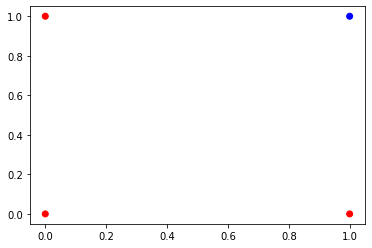

In [50]:
plot_data(and_data, and_labels)

In [51]:
from sklearn.linear_model import Perceptron

perceptron_and = Perceptron()
perceptron_and.fit(and_data, and_labels)

Perceptron()

In [52]:
perceptron_and.score(and_data, and_labels)

1.0

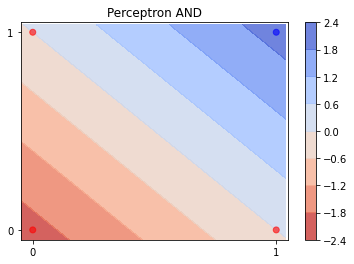

In [53]:
plot_decision_boundary(perceptron_and, and_data, and_labels, "Perceptron AND")

In [54]:
# 거리가 0인 색깔이 boundary므로 올바르게 분류되었다.

### **과제 1-2**

OR 데이터에 대하여 아래 다섯 단계를 수행합니다.

1. OR 데이터를 생성합니다. (```or_data```, ```or_labels```) 
2. ```plot_data``` 함수를 사용하여 데이터 시각화해봅니다.
3. scikit-learn의 Perceptron 모델을 생성하고 (모델의 이름은 ```perceptron_or```) 데이터에 ```.fit()```해봅니다. [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
4. ```.score()```로 데이터에 대해 정확도를 출력합니다.
5. ```plot_decision_boundary()``` 함수를 사용하여 훈련된 perceptron의 decision boundary를 시각화하고 **시각화된 plot을 바탕으로 올바르게 분류가 되었는지 서술합니다**.

In [55]:
#1
import numpy as np

or_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
or_labels = np.array([0, 1, 1, 1])

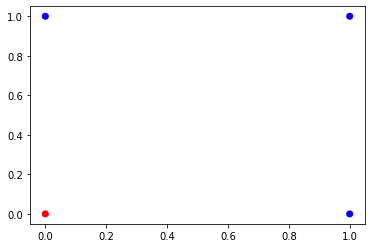

In [56]:
#2
plot_data(or_data, or_labels)

In [57]:
from sklearn.linear_model import Perceptron

perceptron_or = Perceptron()
perceptron_or.fit(or_data, or_labels)

Perceptron()

In [58]:
perceptron_or.score(or_data, or_labels)

1.0

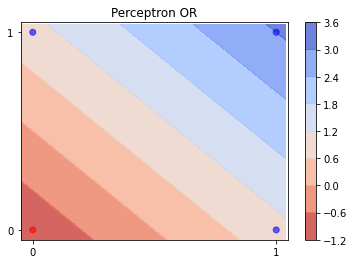

In [59]:
plot_decision_boundary(perceptron_or, or_data, or_labels, "Perceptron OR")

In [60]:
# 거리가 0인 색깔이 boundary므로 올바르게 분류되었다.

### **과제 1-3**

XOR 데이터에 대하여 아래 다섯 단계를 수행합니다.

1. 데이터를 생성합니다. (```xor_data```, ```xor_labels```)
2. ```plot_data``` 함수를 사용하여 데이터 시각화해봅니다.
3. scikit-learn의 Perceptron 모델을 생성하고 (모델의 이름은 ```perceptron_xor```) 데이터에 ```.fit()```해봅니다. [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
4. ```.score()```로 데이터에 대해 정확도를 출력합니다.
5. ```plot_decision_boundary()``` 함수를 사용하여 훈련된 perceptron의 decision boundary를 시각화하고 **시각화된 plot을 바탕으로 올바르게 분류가 되었는지 서술합니다**.

In [61]:
import numpy as np

xor_data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
xor_labels = np.array([0, 1, 1, 0])

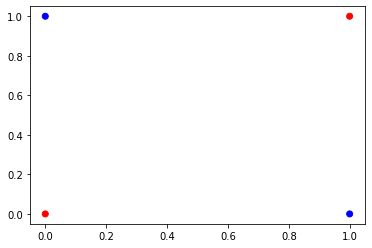

In [62]:
plot_data(xor_data, xor_labels)

In [63]:
from sklearn.linear_model import Perceptron

perceptron_xor = Perceptron()
perceptron_xor.fit(xor_data, xor_labels)

Perceptron()

In [64]:
perceptron_xor.score(xor_data, xor_labels)

0.5

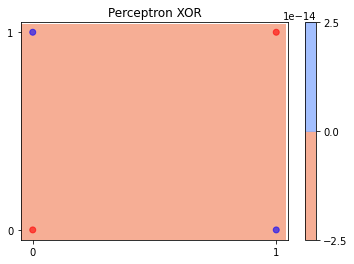

In [65]:
plot_decision_boundary(perceptron_xor, xor_data, xor_labels, "Perceptron XOR")

In [66]:
# 4개 중 2개밖에 분류할 수 밖에 없기때문에 올바르게 분류되지 못하였다.

### **과제 1-4**

XOR 데이터에 대해 scikit-learn의 `MLPClassifier` 모델을 여러개 훈련시키고 (모델의 이름은 `mlp_xor_n`, 여기서 `n`은 숫자입니다) 그 차이점을 분석해봅니다. [MLPClassifier 다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

1. `MLPClassifier`의 다큐멘테이션을 읽고 아래 질문에 대한 답변을 서술합니다.

    1-1. `MLPClassifier` 모델의 기본 hidden layer size는 무엇입니까?

    1-2. 기본 learning rate은 무엇입니까?

    1-3. 기본 maximum iteration 횟수는 무엇입니까?

    1-4. 해당 다큐멘테이션에서 `random_state` 파라미터가 존재하는 이유는 무엇입니까?

2. 모델을 여러개 만들어 `hidden_layer_sizes` 파라미터를 다양하게 조정한 모델을 여러개 만들어 XOR 데이터에 `.fit()`해봅니다. (`random_state=42` 필수 지정)
  
    2-1. `hidden_layer_sizes` 파라미터를 **조정하지 않은** 모델의 정확도, decision boundary을 시각화합니다.

    2-2. `hidden_layer_sizes` 파라미터의 hidden layer 개수와 neuron의 개수를 적절히 **많게** 설정하고 그 모델의 정확도, decision boundary을 시각화합니다.

    2-3. `hidden_layer_sizes` 파라미터의 hidden layer 개수와 neuron의 개수를 적절히 **적게** 설정하고 그 모델의 정확도, decision boundary을 시각화합니다.

    2-4. 과제 1-3의 결과와 어떤 차이점이 있는지 서술합니다.

    2-5. 2-1, 2-2, 2-3에서 나온 decision boundary의 차이를 hidden layer의 dimension과 연관지어 비교해보고, 차이가 나는 이유를 서술해봅니다.



1-4.
1)
1. 기본 hidden layer size는 (100, )이다.
2. 기본 learning rate는 'constant'에 그것의 default 값은 0.001이다.
3. 기본 maximum iteration은 200이다.
4. random_state 파라미터가 존재하는 이유는 난수 생성을 통해 weight와 bias를 초기화하기 위함이며 특히 early stopping이 필요할때 train-test split에서 batch sampling을 결정한다.

In [67]:
#2-1
from sklearn.neural_network import MLPClassifier

mlp_cf_default = MLPClassifier(random_state=42)
mlp_cf_default.fit(xor_data, xor_labels)
print(mlp_cf_default.score(xor_data, xor_labels))

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


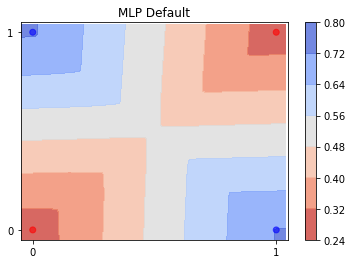

In [68]:
plot_decision_boundary(mlp_cf_default, xor_data, xor_labels, "MLP Default")

In [69]:
#2-2
mlp_extended = MLPClassifier(hidden_layer_sizes=(150, 100, 75), random_state=42)
mlp_extended.fit(xor_data, xor_labels)
print(mlp_extended.score(xor_data, xor_labels))

1.0


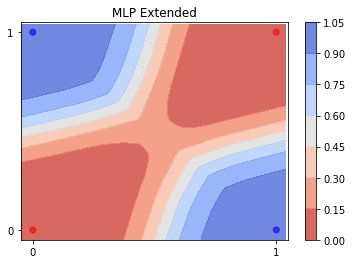

In [70]:
plot_decision_boundary(mlp_extended, xor_data, xor_labels, "MLP Extended")

In [71]:
#2-3
mlp_shrink = MLPClassifier(hidden_layer_sizes=(75, 50), random_state=42)
mlp_shrink.fit(xor_data, xor_labels)
print(mlp_shrink.score(xor_data, xor_labels))

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


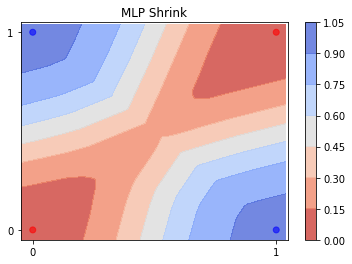

In [72]:
plot_decision_boundary(mlp_shrink, xor_data, xor_labels, "MLP Shrink")

2-4)
MLP의 경우 Multi-layer이므로 linearity가 깨지게된다. 과제 1.1~1.3에서는 decision boundary가 linear하게 나타나고, 특히 과제 1.3에서는 linear로 classify를 하려다보니 정확한 분류에 실패하였는데, MLP는 non-linearity가 가능하여 정확한 classify가 가능하다. 즉, MLP의 plot에서 decision boundary가 linear하지 않다.

2-5)
hidden layer size가 커질수록 non-linearity가 많이 부여됨에 따라 높은 확률의 area가 넓어지고 boundary가 더 멀리 나아가는 양상을 가진다.

# **과제 2**

1. 3차시 과제와 동일한 방식으로 titanic 데이터를 전처리합니다.

    - 사용 column: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`, `Survived`
    - NA가 있는 열 drop 하기
    - `Sex` feature 정수형으로 인코딩
    - `Embarked` feature one-hot으로 인코딩
    - `x` 와 `y` 를 분리 (`y`은 `Survived` feature)
    - 데이터를 train와 test 데이터로 split (`random_state=42`)

2. scikit-learn의 MLPClassifier을 사용하여 classification을 합니다. [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

3. 어떠한 모델 파라미터도 조정하지 않은 baseline ```MLPClassifier``` 모델을 생성하고 훈련시켜 테스트 데이터에 대한 정확도를 출력합니다.

4. 두번째 `MLPClassifier` 모델을 생성합니다. 이번에는 다큐멘테이션을 읽고 모델 파라미터를 조정합니다. 조정하는 파라미터는 ```hidden_layer_sizes```, ```activation```, ```learning_rate_init```, ```max_iter``` 입니다. 네가지 파라미터를 모두 조정하여도 되고 이 중 선택하여 조정하여도 됩니다. 이 모델이 baseline 모델보다 테스트 데이터에 대해 정확도가 높게 나오도록 파라미터를 조정해야 합니다. 두번째 모델에 대한 정확도 또한 출력합니다.

5. 모델 파라미터를 어떻게 조정하여 정확도를 높일 수 있었는지 서술합니다.

In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
data_url = "https://raw.githubusercontent.com/inikoreaackr/ml_datasets/main/titanic.csv"
data = pd.read_csv(data_url)

In [74]:
data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
data = data.dropna()
label_encoder = LabelEncoder()
data.Sex = label_encoder.fit_transform(data.Sex)
data = pd.concat([data, pd.get_dummies(data['Embarked'], prefix='Embarked')], axis=1).drop(['Embarked'], axis=1)

y = data[['Survived']].to_numpy().ravel()
x = data.drop(columns=['Survived'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [75]:
from sklearn.neural_network import MLPClassifier

mlp_cf = MLPClassifier(random_state=42)
mlp_cf.fit(x_train, y_train)
print(mlp_cf.score(x_test, y_test))

0.7429906542056075


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [76]:
hidden_layer_sizes = [100, 200, 300, 400]
max_iters = [1000, 2000, 3000, 4000]
lrs = [0.005, 0.01, 0.015]

best_acc = -1

for h in hidden_layer_sizes:
  for i in max_iters:
    for lr in lrs:
      mlp_cf_tuned = MLPClassifier(hidden_layer_sizes=(h, ), max_iter=i, learning_rate_init=lr, activation='relu', random_state=42)
      mlp_cf_tuned.fit(x_train, y_train)
      cur_acc = mlp_cf_tuned.score(x_test, y_test)
      if cur_acc > best_acc:
        best_acc = cur_acc
        best_model_params = [h, i, lr]

print(best_acc)
print(best_model_params)

0.794392523364486
[400, 1000, 0.005]


2-5.
모델에 적합할 것으로 예측되는 파라미터를 리스트에 저장하고 반복문을 활용하여 각 파라미터 조합에 의해 만들어지는 모델들을 생성하고 정확도를 비교한다. 이처럼 parameter tuning test를 통해 생성된 모델 중 가장 높은 정확도를 보인 모델을 채택함으로써 모델의 정확도를 높일 수 있다. 위 코드에서는 hidden layer의 size, max iteration, learning rate를 조정하는데, 각 값이 400, 1000, 0.005일때가 테스팅에서 가장 높은 성능을 보였다.

# 실습 4차시 설문 조사

실습 과제를 모두 마친 후 설문에 참여해주세요. \
링크: https://forms.gle/t7hF3ZPyJ6Li4Voq7

※설문에 참여해주신 수강생분들 중 다섯 명을 추첨하여 작은 선물을 드릴 예정이오니, 수강생분들의 많은 참여 바랍니다.※